In [ ]:
import numpy as np
import pandas as pd

# Data Selection

In [ ]:
crop = pd.read_csv("/content/Crop_recommendation.csv")
crop.head()


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
crop.shape

(2200, 8)

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop.duplicated().sum()

0

In [ ]:
crop.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

# Feature Selection

In [ ]:

numeric_crop = crop.select_dtypes(include=['float', 'int'])
corr = numeric_crop.corr()
corr

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

# Correlation Matrix

<Axes: >

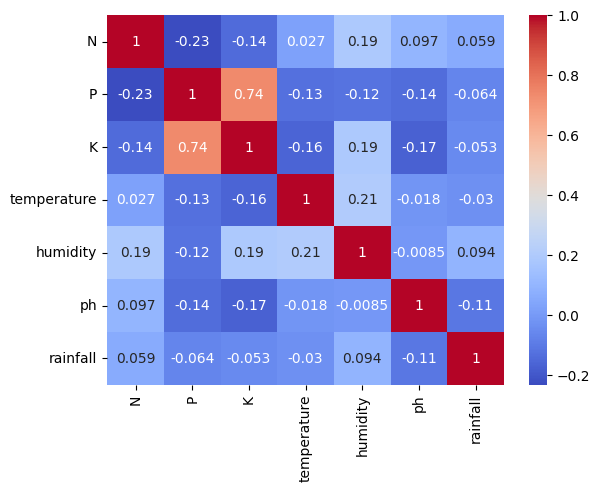

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

# Data Visualization

<ipython-input-54-112d7ba78cc4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


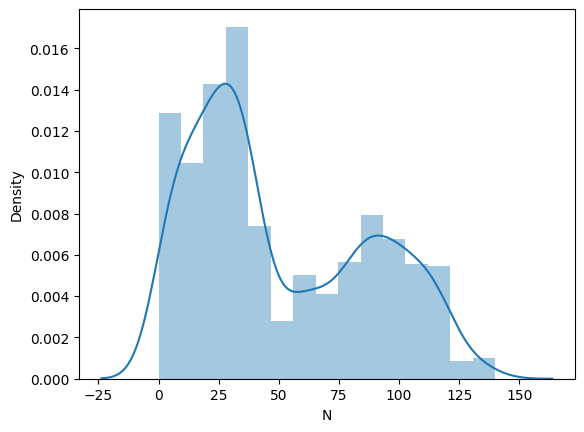

In [ ]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [ ]:
crop_copy=crop.copy()

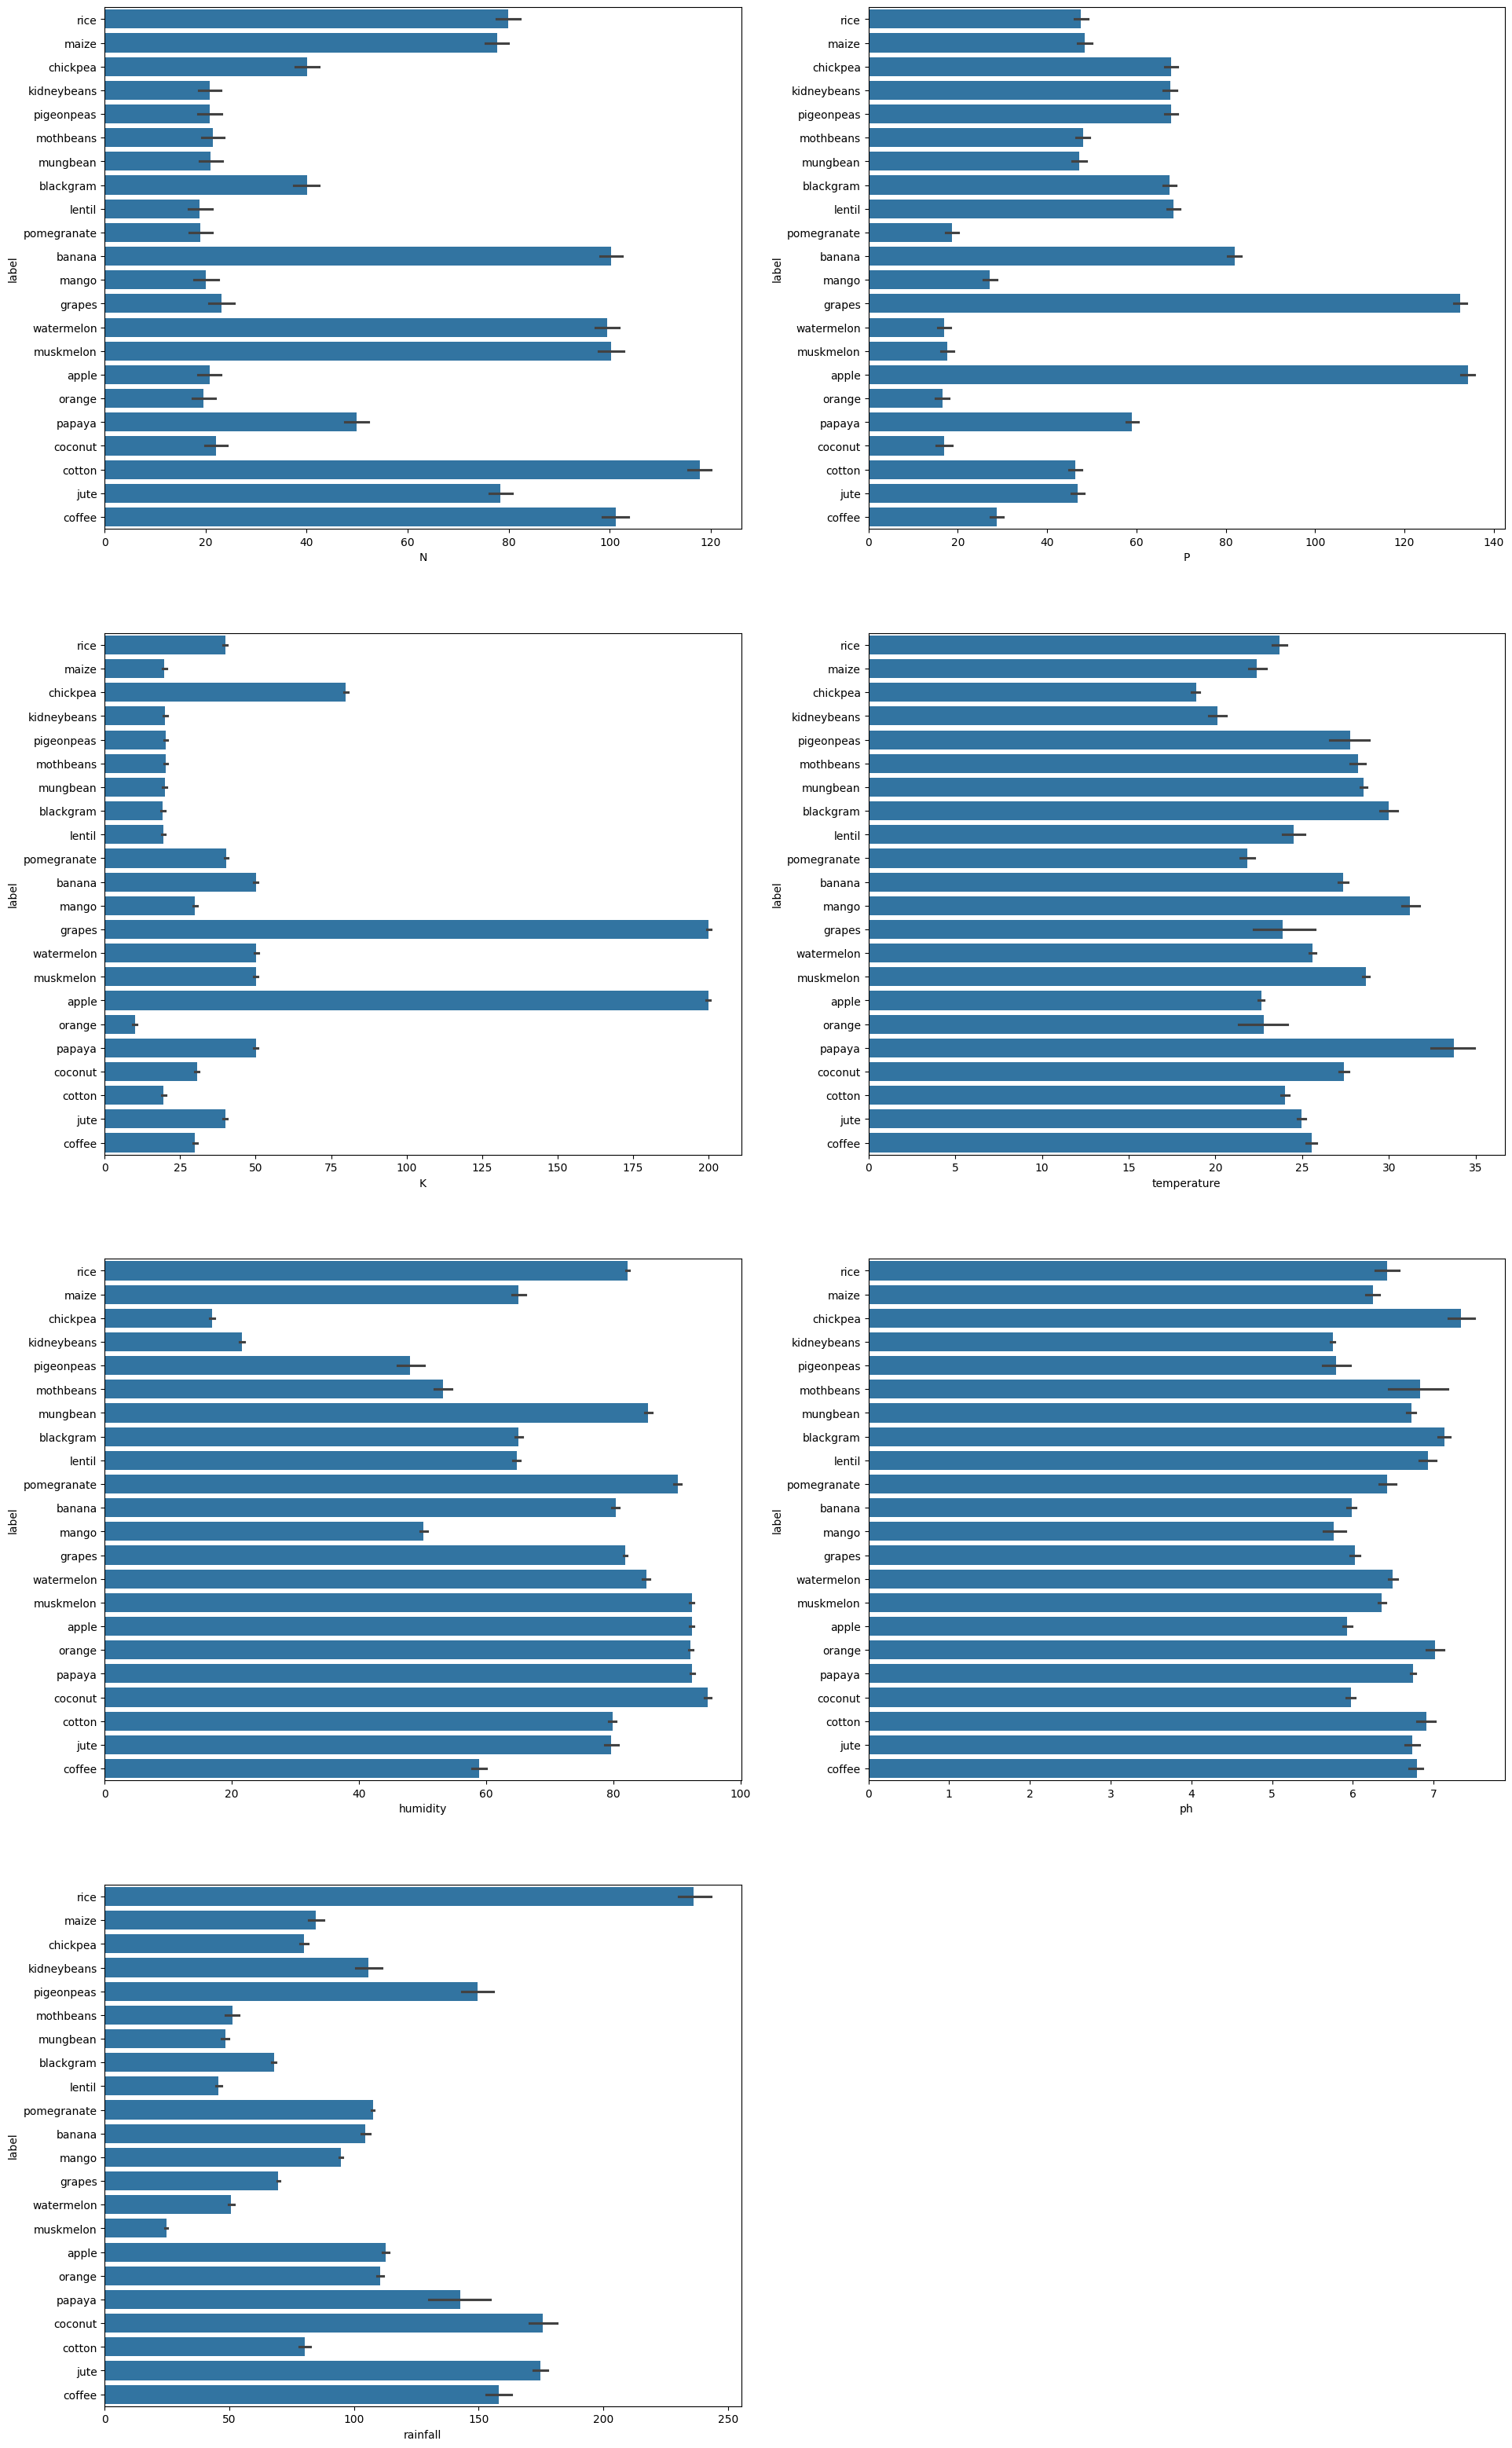

In [ ]:
# Barplots.

cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph',
       'rainfall']
target = 'label'

def create_barplots(crop_copy , cols) :

    i = 1
    plt.figure(figsize = (23,50))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.barplot(data = crop_copy , x = col_name , y = target)
        i += 1

create_barplots(crop_copy , cols)

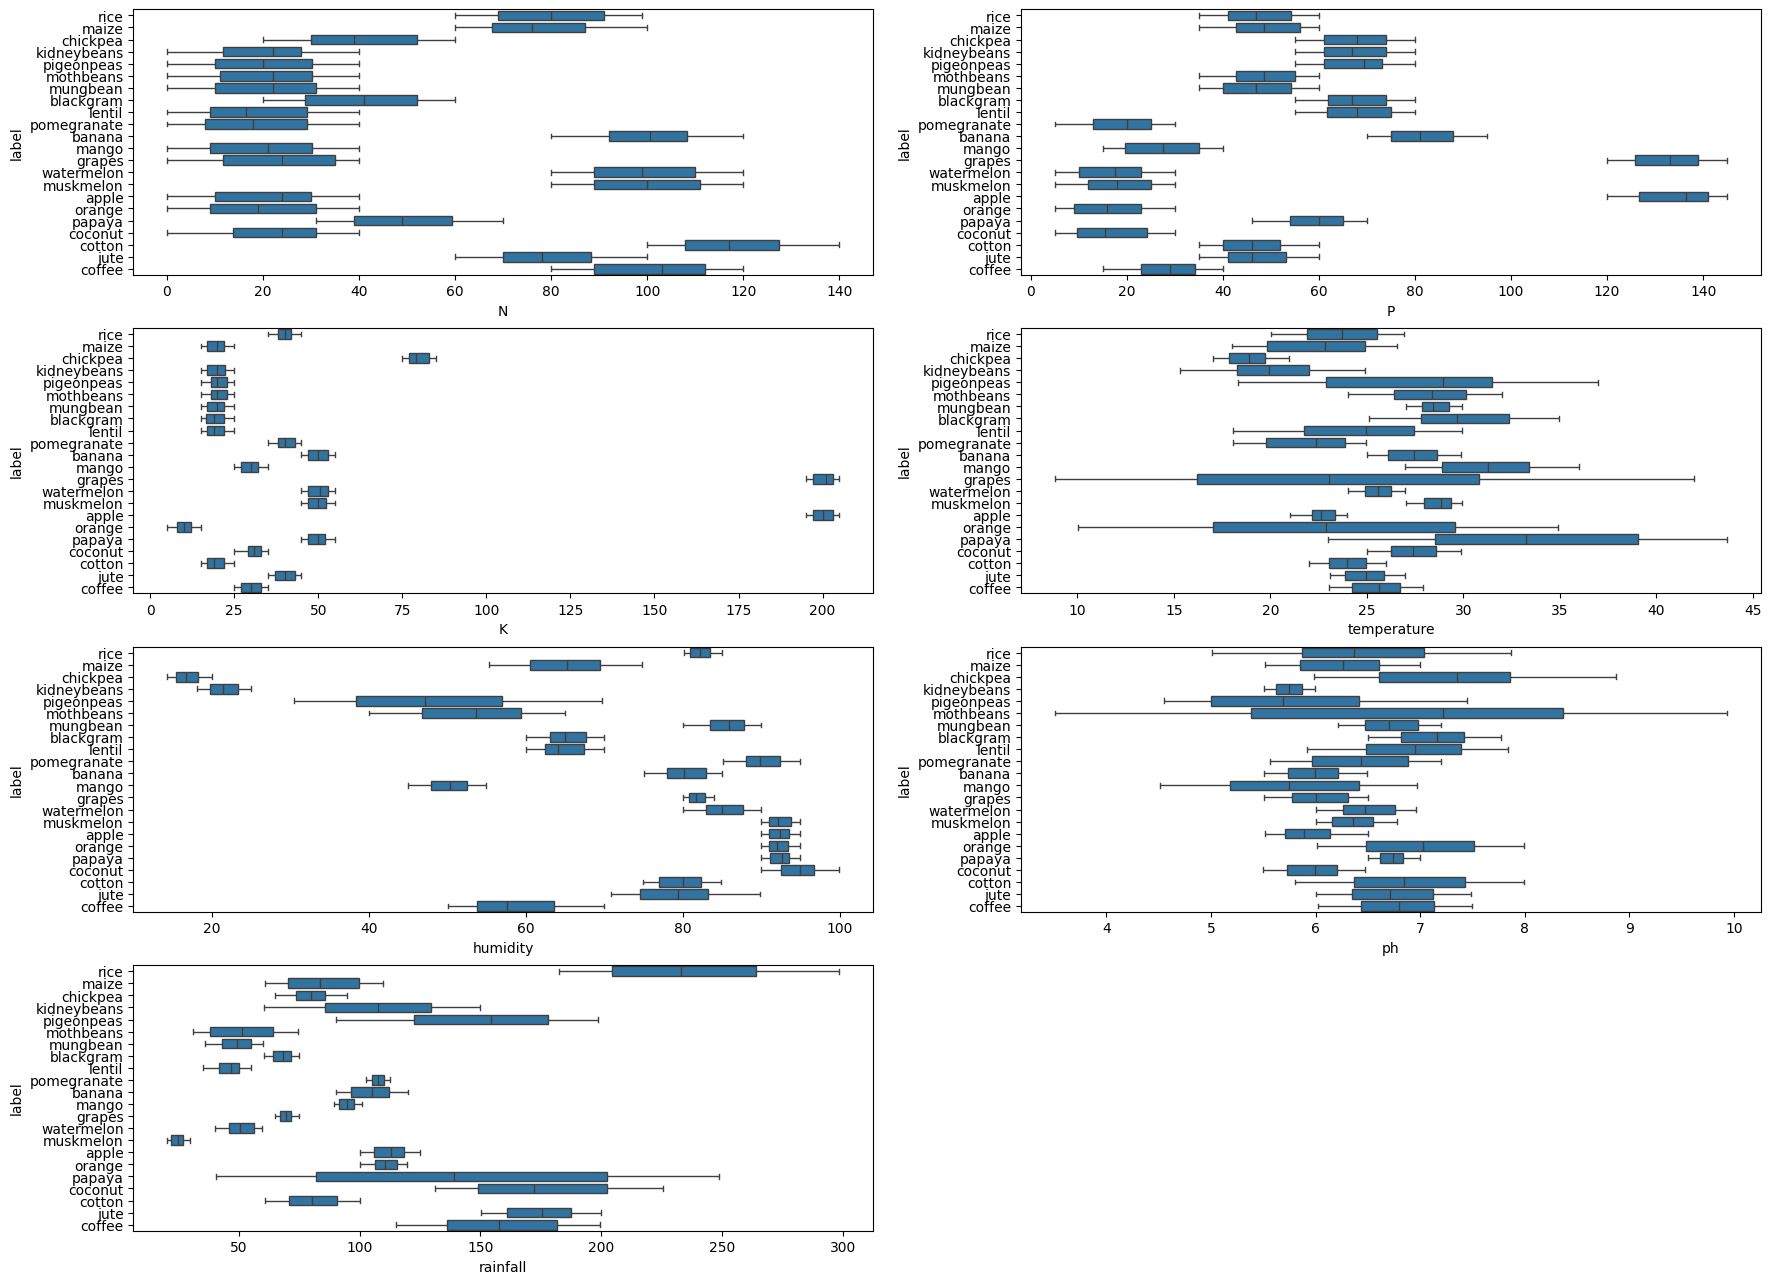

In [ ]:
# Box-plots .

cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph',
       'rainfall']
target = 'label'

def create_boxplots(crop_copy , cols) :

    i = 1
    plt.figure(figsize = (21,20))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.boxplot(data = crop_copy , x = col_name , y = target)
        i += 1

create_boxplots(crop_copy , cols)

In [ ]:
def label_crop(crop):
    if crop in ['pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'coffee']:
        return 'Fruit'
    elif crop in ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil']:
        return 'Grain'
    return 'Fiber'

In [ ]:
def get_sowing_season(crop):
    return 'Summer' if crop in ['rice', 'maize', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'kidneybeans', 'cotton', 'jute', 'watermelon', 'muskmelon','coffee'] else 'Winter'

In [ ]:
crop_copy['Crop_Type'] = crop_copy.label.apply(lambda row: label_crop(row))
crop_copy['Sown_Season'] = crop_copy.label.apply(lambda row: get_sowing_season(row))

In [ ]:
crop_copy.Crop_Type.value_counts()

Crop_Type
Fruit    1100
Grain     900
Fiber     200
Name: count, dtype: int64

In [ ]:
crop_copy.Sown_Season.value_counts()

Sown_Season
Summer    1200
Winter    1000
Name: count, dtype: int64

# Data Preprocessing

### Label Encoding

In [ ]:
crop_dict = {
    'rice': 0,
    'maize': 1,
    'jute': 2,
    'cotton': 3,
    'coconut': 4,
    'papaya': 5,
    'orange': 6,
    'apple': 7,
    'muskmelon': 8,
    'watermelon': 9,
    'grapes': 10,
    'mango': 11,
    'banana': 12,
    'pomegranate': 13,
    'lentil': 14,
    'blackgram': 15,
    'mungbean': 16,
    'mothbeans': 17,
    'pigeonpeas': 18,
    'kidneybeans': 19,
    'chickpea': 20,
    'coffee': 21
}
crop['crop_num']=crop['label'].map(crop_dict)  #Maps each label to a number mentioned in above dictionary

In [ ]:
crop.head()

N   P   K  temperature   humidity        ph    rainfall label  crop_num
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice         0
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice         0
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice         0
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice         0
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice         0

In [ ]:
crop['crop_num'].value_counts()

crop_num
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

### Removal of Outliers

In [ ]:
# Function to remove outliers     #ye wale part ko hum preprocessing me dale kya?
def remove_outliers(crop):
    numeric_crop = crop.select_dtypes(include='number')  #Added this line to select only numeric columns
    Q1 = numeric_crop.quantile(0.25)
    Q3 = numeric_crop.quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = crop[~((numeric_crop < (Q1 - 1.5 * IQR)) | (numeric_crop > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_filtered

df_filtered = remove_outliers(crop)
print("Data before removing outliers:")
print(crop)
print("Data after removing outliers:")
print(df_filtered)


Data before removing outliers:
        N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      crop_num  
0            0  
1            0  
2            0  


In [ ]:
crop=df_filtered.copy()

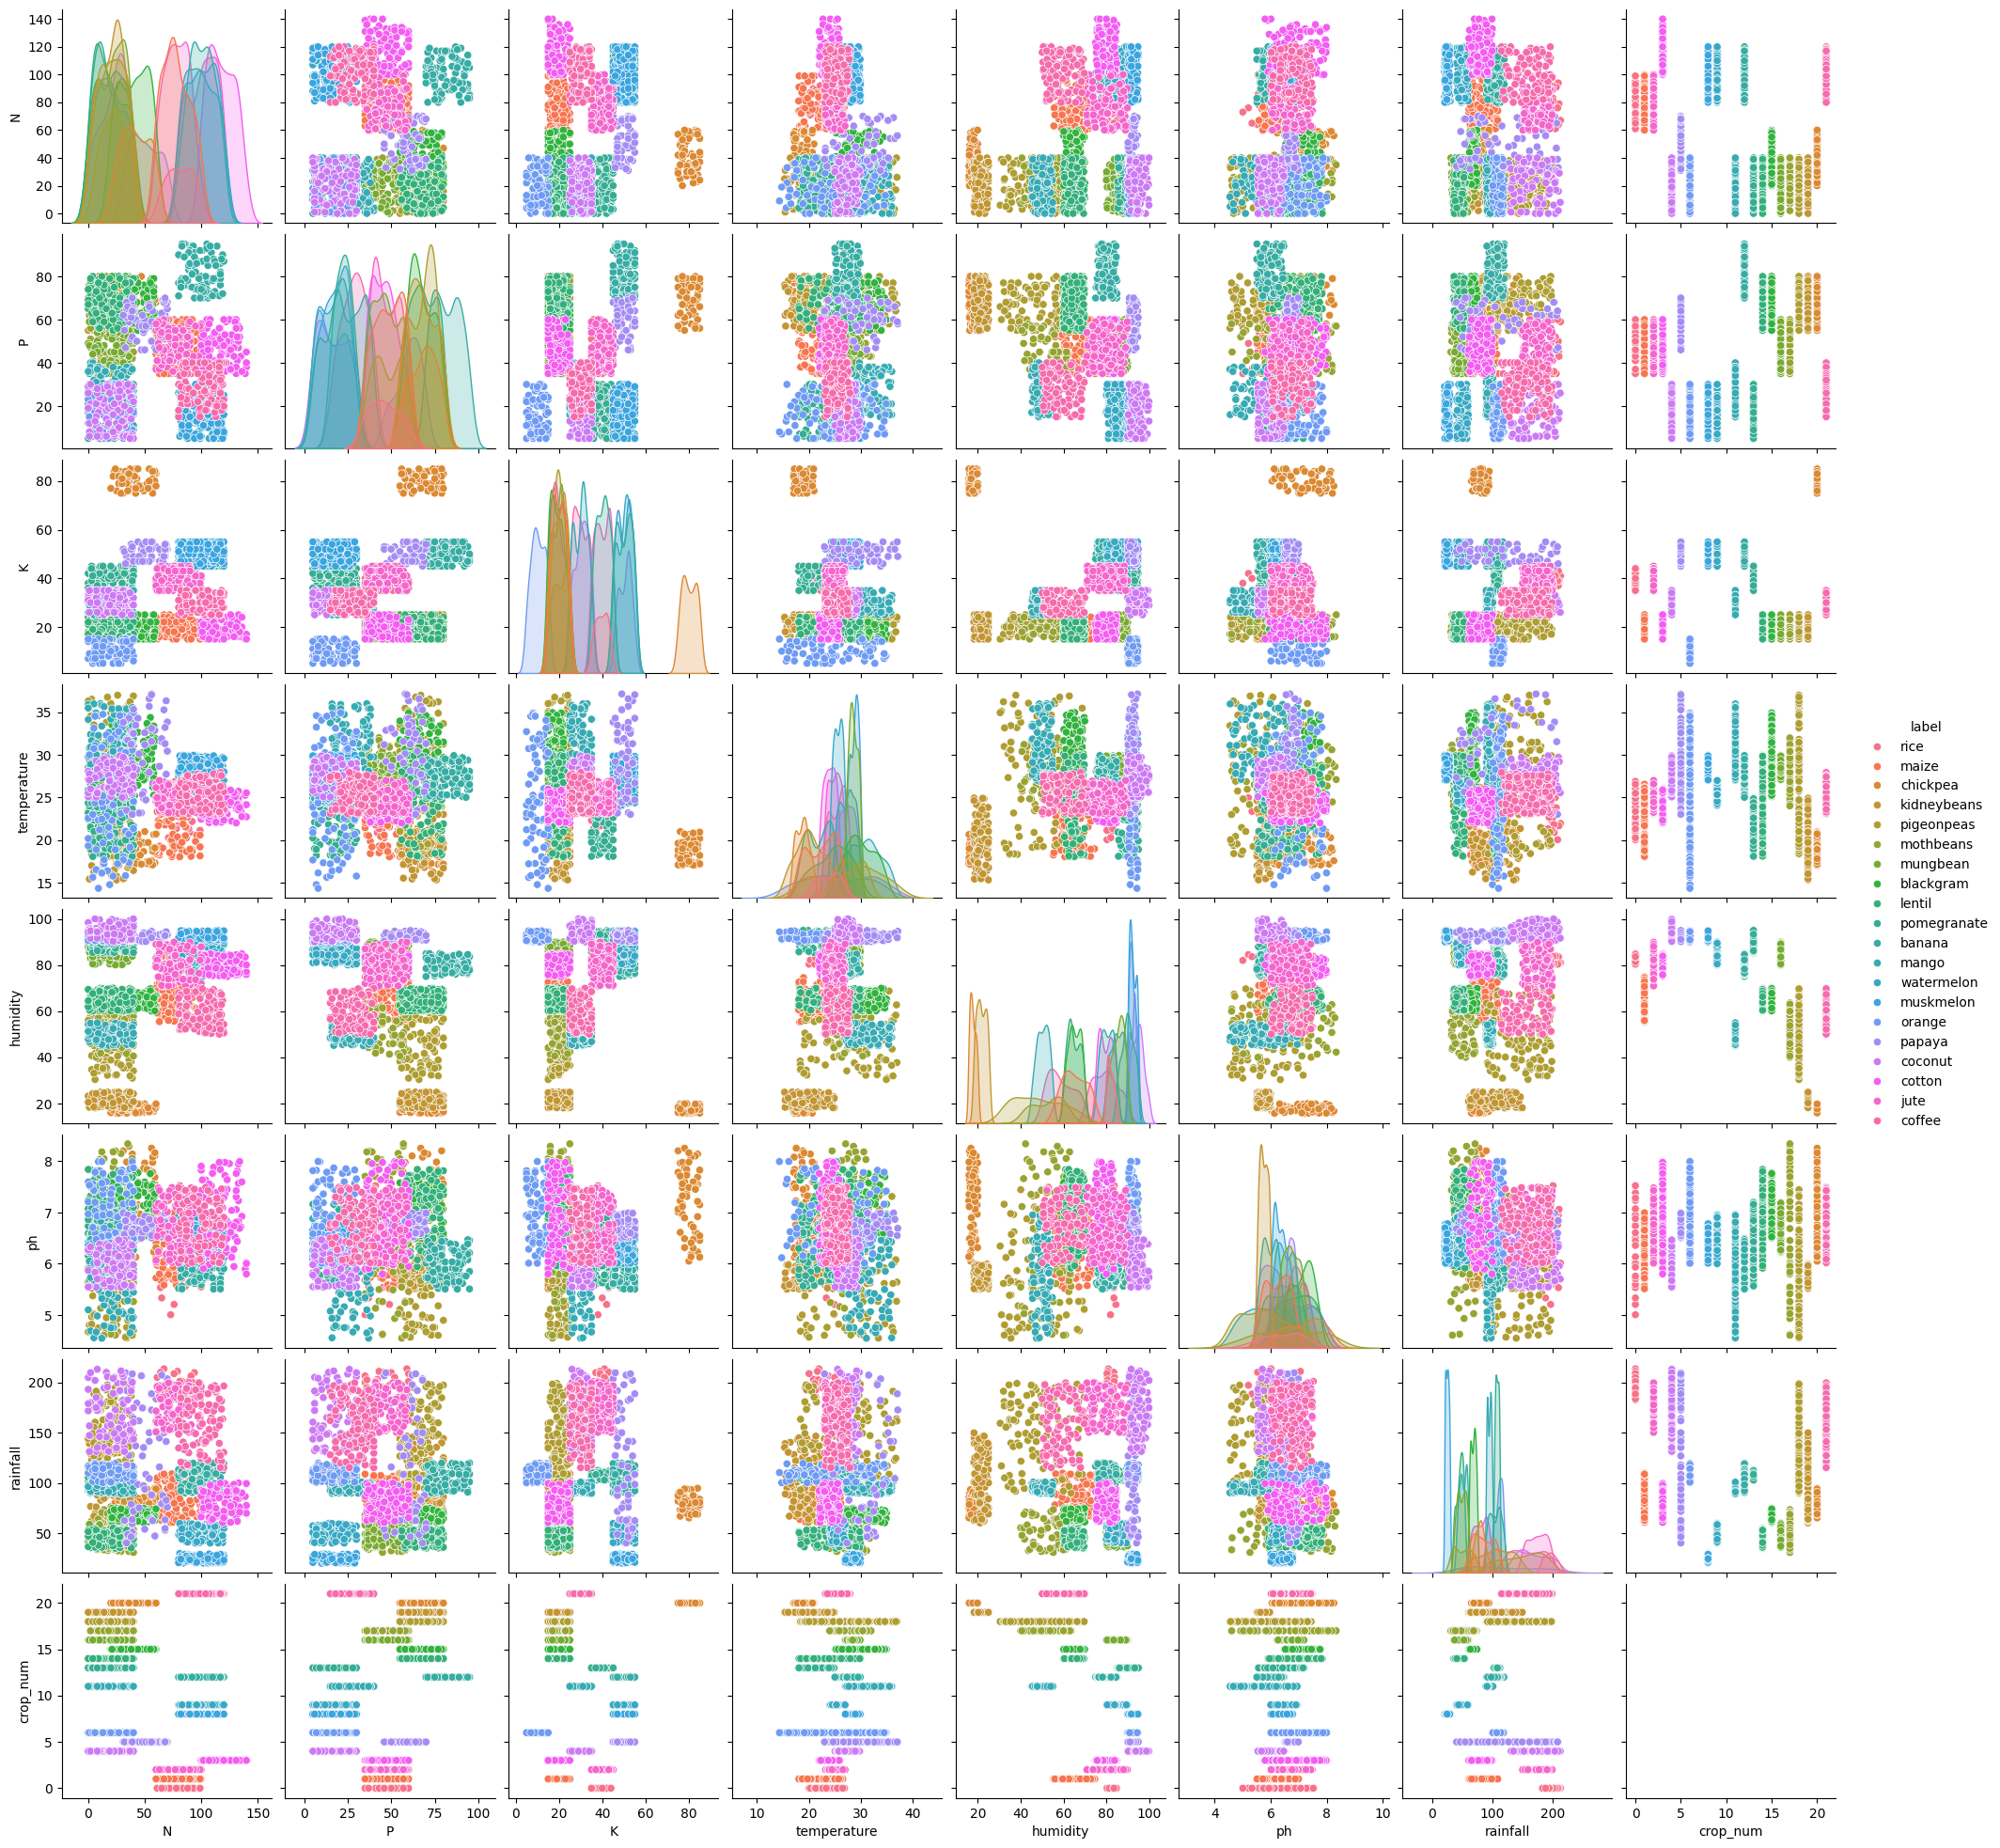

In [ ]:
# Visualize data distribution
sns.pairplot(df_filtered, hue='label')
plt.show()

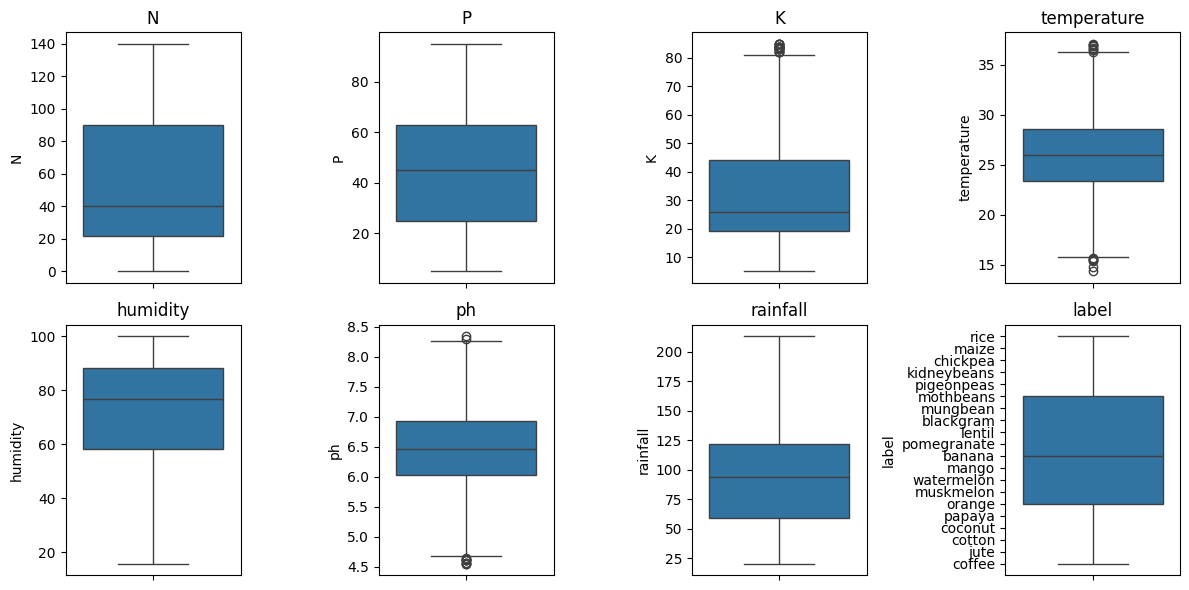

In [ ]:
# Boxplot for each feature
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_filtered.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_filtered[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

N   P   K  temperature   humidity        ph    rainfall  crop_num
0   90  42  43    20.879744  82.002744  6.502985  202.935536         0
13  93  56  36    24.014976  82.056872  6.984354  185.277339         0
14  94  50  37    25.665852  80.663850  6.948020  209.586971         0
17  91  35  39    23.793920  80.418180  6.970860  206.261186         0
20  89  45  36    21.325042  80.474764  6.442475  185.497473         0

# Spliting Data into Test and Train

In [ ]:
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [ ]:
X.shape

(1768, 7)

In [ ]:
y.shape

(1768,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1414, 7)

In [ ]:
X_test.shape

(354, 7)

In [ ]:
X_train

N   P   K  temperature   humidity        ph    rainfall
822    12  66  20    27.414350  63.417860  7.336117   44.431775
944    37  11  36    24.247796  85.560333  6.710143  106.921603
1689   34  11  10    31.750489  94.595512  7.362208  115.198930
1423   91  13  47    29.109683  92.435110  6.144109   27.956023
602    36  55  20    27.014704  84.342627  6.635969   55.296354
...   ...  ..  ..          ...        ...       ...         ...
1384   99   6  45    26.125889  86.550794  6.000976   40.712101
1656   17  16  14    16.396243  92.181519  6.625539  102.944161
1012   95  75  50    28.081661  75.264298  5.623616  118.276189
1889   40  22  29    27.558218  99.981876  5.735364  174.625648
1380  113  30  50    26.039672  83.986244  6.277484   43.877123

[1414 rows x 7 columns]

In [ ]:
X_test

N   P   K  temperature   humidity        ph    rainfall
1126  38  19  31    34.738239  49.088643  5.855119   90.650222
385   32  68  19    24.628350  18.183252  5.514234  149.744103
534   36  57  16    28.614091  57.142188  8.292876   57.028917
1114  12  19  31    27.253734  52.663197  5.566704   91.873125
670   20  41  20    29.273086  89.487502  7.073048   50.924655
...   ..  ..  ..          ...        ...       ...         ...
1617  22  17   5    24.121887  90.723516  6.945563  102.835632
308   17  59  17    18.416700  23.428299  5.689858  132.980105
52    93  56  42    23.857240  82.225730  7.382763  195.094831
375    5  74  21    16.244692  21.357939  5.591704   66.970533
690   26  54  17    28.547414  88.957045  6.272588   49.489725

[354 rows x 7 columns]


# Normalization of data using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
# minmax scaler brings the data to a specific range, so that we can train data easily and efficiently
X_train_MMS = ms.fit_transform(X_train)
X_test_MMS = ms.transform(X_test)

In [ ]:
X_train_MMS.shape
y_train.shape

(1414,)

In [ ]:
y_train.shape

(1414,)

# Training Model using minmax scalar & Error Evaluation

In [ ]:
sorted(y_train.unique())



[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [ ]:
sorted(y_test.unique())

[0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

Support Vector Machine with accuracy: 0.9802
Support Vector Machine with balance accuracy: 0.9407
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.95      0.97        19
           2       0.79      0.94      0.86        16
           3       0.95      1.00      0.97        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        26
          14       0.95      1.00      0.97        18
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      0.93    

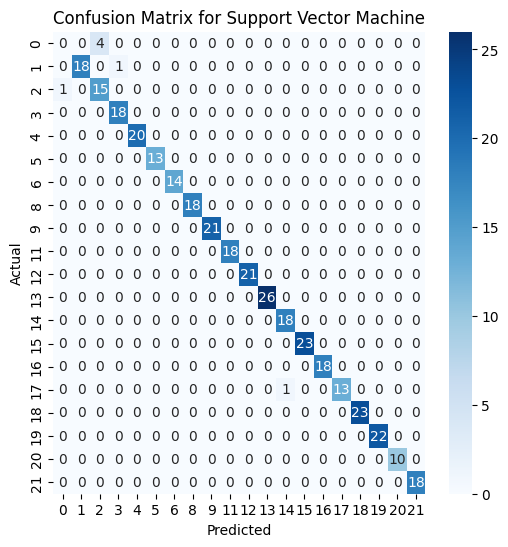

K-Nearest Neighbors with accuracy: 0.9746
K-Nearest Neighbors with balance accuracy: 0.9368
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.89      0.94        19
           2       0.80      1.00      0.89        16
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        26
          14       0.95      1.00      0.97        18
          15       0.92      1.00      0.96        23
          16       1.00      1.00      1.00        18
          17       1.00      0.93      0.96

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

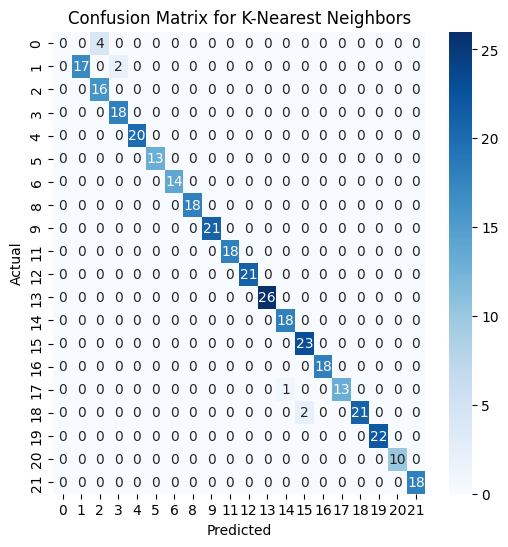

Random Forest with accuracy: 0.9887
Random Forest with balance accuracy: 0.9599
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      0.95      0.97        19
           2       0.84      1.00      0.91        16
           3       0.95      1.00      0.97        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        14
 

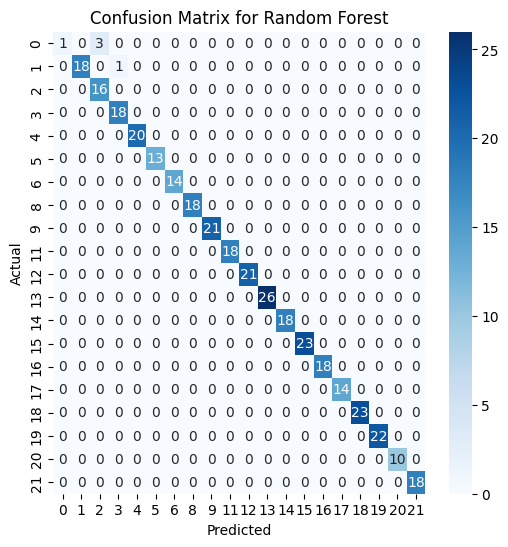

Linear Discriminant Analysis with accuracy: 0.9548
Linear Discriminant Analysis with balance accuracy: 0.9193
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.89      0.94        19
           2       0.79      0.94      0.86        16
           3       0.90      1.00      0.95        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        26
          14       0.82      1.00      0.90        18
          15       0.81      0.91      0.86        23
          16       1.00      1.00      1.00        18
          17       1.00  

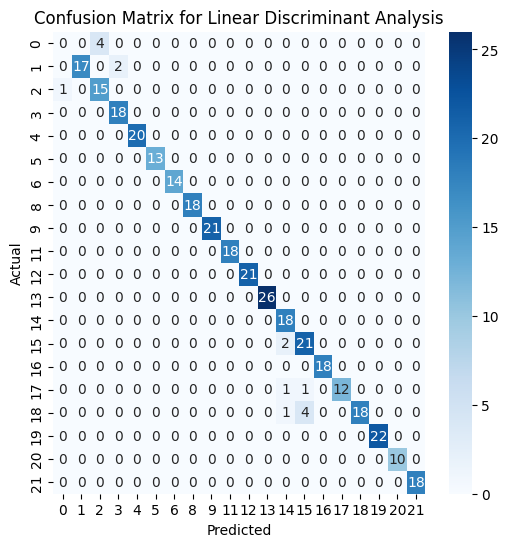

XGBoost with accuracy: 0.1864
XGBoost with balance accuracy: 0.2000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        19
           2       0.05      1.00      0.10        16
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        14
           8       1.00      1.00      1.00        18
           9       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        18
          17       0.00      0.00      0.00        14
          18 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

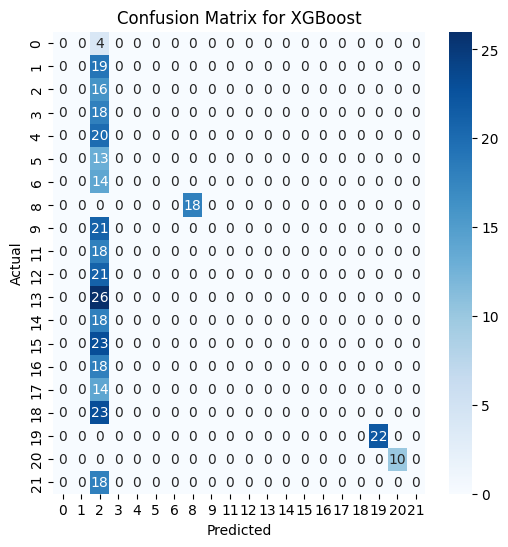

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier


# create instances of all models
models = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'XGBoost': AdaBoostClassifier(),
}

# Train and evaluate each model
for name, md in models.items():
    md.fit(X_train_MMS, y_train)
    ypred = md.predict(X_test_MMS)
    print(f"{name} with accuracy: {accuracy_score(y_test, ypred):.4f}")
    print(f"{name} with balance accuracy: {balanced_accuracy_score(y_test, ypred):.4f}")
    class_rep=classification_report(y_test,ypred)
    print(class_rep)
    print(f"{name} with precison: {precision_score(y_test, ypred, average='weighted'):.4f}")
    print(f"{name} with recall: {recall_score(y_test, ypred, average='weighted'):.4f}")
    print(f"{name} with f1 score: {f1_score(y_test, ypred, average='weighted'):.4f}")

    cm = confusion_matrix(y_test, ypred)


    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=md.classes_, yticklabels=md.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



# Predictive System

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9887005649717514

In [ ]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]])
    transformed_features = ms.fit_transform(features)
    #transformed_features = sc.fit_transform(transformed_features)
    prediction = rfc.predict(transformed_features).reshape(1,-1)

    return prediction[0]

In [ ]:
def recommendation(N, P, k, temperature, humidity, ph, rainfal, ms, rfc):
    # Create a 2D array with the input features
    features = np.array([[N, P, k, temperature, humidity, ph, rainfal]])

    # Transform the features using the pre-fitted Min-Max Scaler
    transformed_features = ms.transform(features)

    # Further transform the features using the pre-fitted Standard Scaler
    #transformed_features = sc.transform(transformed_features)

    # Predict using the pre-trained Random Forest Classifier
    prediction = rfc.predict(transformed_features).reshape(1, -1)

    # Return the first element of the prediction
    return prediction[0]


In [ ]:
N = 4
P = 72
k = 7
temperature = 17
humidity = 16
ph = 7
rainfall = 88

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall,ms,rfc)


crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

print(predict)
if predict[0] in crop_dict:
    crop_str = crop_dict[predict[0]]
    print("{} is a best crop to be cultivated ".format(crop_str))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[19]
Pigeonpeas is a best crop to be cultivated 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
